In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True

from neuralforecast.models import NHITS, NBEATSx
from neuralforecast import NeuralForecast
from neuralforecast.losses.pytorch import HuberLoss, MQLoss
from neuralforecast.tsdataset import TimeSeriesDataset

In [6]:
N = 10_000
T = 1.0 / 800.0  # sample spacing
x = np.linspace(0.0, N * T, N, endpoint=False)

low_frequency_signal = np.sin(10.0 * 2.0 * np.pi * x)
high_frequency_signal = 0.5 * np.sin(100 * 2.0 * np.pi * x)
mixed_signal = low_frequency_signal + high_frequency_signal

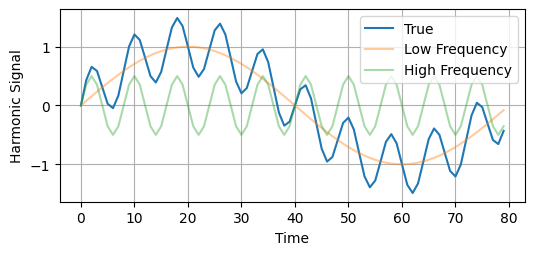

In [9]:
fig, ax = plt.subplots(figsize=(6, 2.5))
plt.plot(mixed_signal[:80], label="True")
plt.plot(low_frequency_signal[:80], label="Low Frequency", alpha=0.4)
plt.plot(high_frequency_signal[:80], label="High Frequency", alpha=0.4)
plt.ylabel("Harmonic Signal")
plt.xlabel("Time")
plt.legend()
plt.show()
plt.close()

In [10]:
# Split dataset into train/test
# Last horizon observations for test
horizon = 96
Y_df = pd.DataFrame(dict(unique_id=1, ds=np.arange(len(x)), y=y))
Y_train_df = Y_df.groupby("unique_id").head(len(Y_df) - horizon).reset_index()
Y_test_df = Y_df.groupby("unique_id").tail(horizon).reset_index()
Y_test_df

,index,unique_id,ds,y
0,9904,1,9904,-0.951057
1,9905,1,9905,-0.570326
2,9906,1,9906,-0.391007
3,9907,1,9907,-0.499087
4,9908,1,9908,-0.809017
...,...,...,...,...
91,9995,1,9995,-0.029130
92,9996,1,9996,-0.309017
93,9997,1,9997,-0.586999
94,9998,1,9998,-0.656434


In [13]:
models = [
    NHITS(
        h=horizon,  # Forecast horizon
        input_size=2 * horizon,  # Length of input sequence
        loss=HuberLoss(),  # Robust Huber Loss
        max_steps=1000,  # Number of steps to train
        dropout_prob_theta=0.5,
        interpolation_mode="linear",
        stack_types=["identity"] * 2,
        n_blocks=[1, 1],
        mlp_units=[[64, 64], [64, 64]],
        n_freq_downsample=[
            10,
            1,
        ],  # Inverse expressivity ratios for NHITS' stacks specialization
        val_check_steps=10,  # Frequency of validation signal (affects early stopping)
    )
]
nf = NeuralForecast(models=models, freq=1)
nf.fit(df=Y_train_df)

[rank: 0] Seed set to 1
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForec ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForec ...
You are using a CUDA device ('NVIDIA A100-SXM4-40GB MIG 2g.10gb') that has Ten

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training 

Training: |          | 0/? [00:00<?, ?it/s]

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [16]:
# NHITS decomposition plot
model = nf.models[0]
dataset, *_ = TimeSeriesDataset.from_df(df=Y_train_df)
y_hat = model.decompose(dataset=dataset)

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForec ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-cae70dfc-738b-5d40-8d90-2d3dbea3a80c]
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

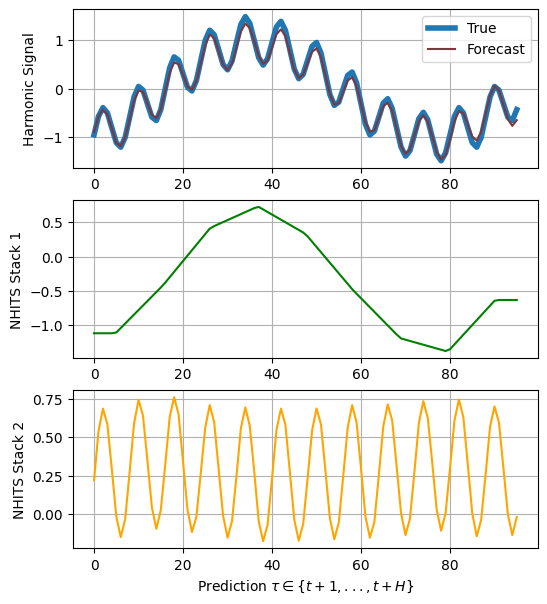

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(6, 7))

ax[0].plot(Y_test_df["y"].values, label="True", linewidth=4)
ax[0].plot(y_hat.sum(axis=1).flatten(), label="Forecast", color="#7B3841")
ax[0].legend()
ax[0].set_ylabel("Harmonic Signal")

ax[1].plot(y_hat[0, 1] + y_hat[0, 0], label="stack1", color="green")
ax[1].set_ylabel("NHITS Stack 1")

ax[2].plot(y_hat[0, 2], label="stack2", color="orange")
ax[2].set_ylabel("NHITS Stack 2")
ax[2].set_xlabel(r"Prediction $\tau \in \{t+1,..., t+H\}$")
plt.show()